# Advection Equation LEAPFROG

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

We will use Leapfrog (Periodic boundary conditions in np.roll)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step we will come back to this 
t_final = 20.0 

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt) #how many iteration


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)


# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [17]:
os.makedirs('./LEAPFROG', exist_ok=True)

os.listdir('./');

In [18]:
# Initilize time and iteration counter
t = 0.0
i = 0

Analtics=1 # Use or not the analytic solution       

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./LEAPFROG/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final: 
    if t==0:
        if Analtics==0:         #use Lax_Friedrichs scheme for the first step
            u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
        else :  #use the analytic solution for the first step
            u_next = np.exp(-(x-a*dt-x0)**2)
    else:    
        u_next = u_previous- a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
      
    
    # Update the solution---3 levels needed for leapfrog
    u_previous= u_current.copy()
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.1,1.1)
        plt.savefig('./LEAPFROG/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

np.save('./LEAPFROG/l2norm'+str(cf)+'.npy', np.array(l2norm)) 
np.save('./LEAPFROG/time'+str(cf)+'.npy', np.array(time))


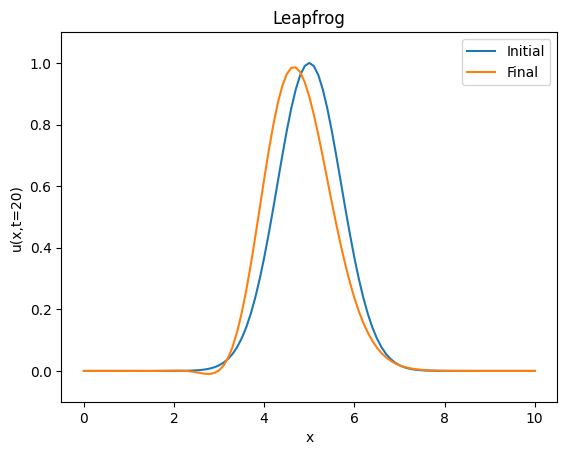

In [19]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Leapfrog')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.savefig('./LEAPFROG/final'+str(cf)+'.png', dpi=200)
plt.legend()
plt.show()

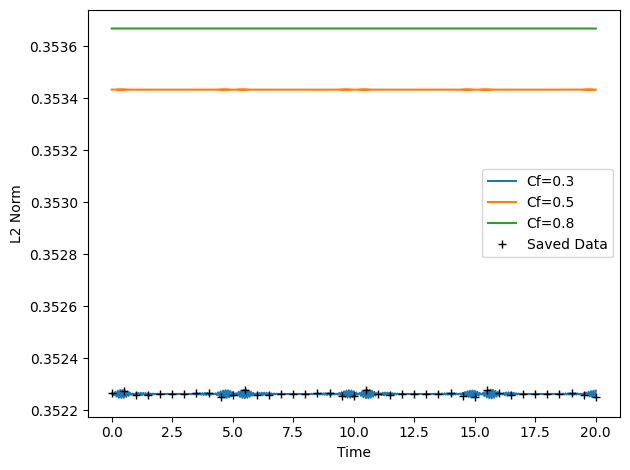

In [20]:
#Compare with data given
# norm1=np.load('./LEAPFROG/l2norm0.3.npy')
# time1=np.load('./LEAPFROG/time0.3.npy')
# norm2=np.load('./LEAPFROG/l2norm0.5.npy')
# time2=np.load('./LEAPFROG/time0.5.npy')
# norm3=np.load('./LEAPFROG/l2norm0.8.npy')
# time3=np.load('./LEAPFROG/time0.8.npy')

norm1 = np.load('./LEAPFROG/l2norm101.npy')
time1 = np.load('./LEAPFROG/time101.npy')
norm2 = np.load('./LEAPFROG/l2norm301.npy')
time2 = np.load('./LEAPFROG/time301.npy')
norm3 = np.load('./LEAPFROG/l2norm501.npy')
time3 = np.load('./LEAPFROG/time501.npy')

l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')

plt.xlabel('Time')
plt.ylabel('L2 Norm')

# plt.plot(time1,norm1, label='Cf=0.3')
# plt.plot(time2,norm2, label='Cf=0.5')
# plt.plot(time3,norm3, label='Cf=0.8')

plt.plot(time1,norm1, label='Cf=0.3')
plt.plot(time2,norm2, label='Cf=0.5')
plt.plot(time3,norm3, label='Cf=0.8')

plt.plot(l2_saved[:,0], l2_saved[:,1], '+', color='black', label='Saved Data')

plt.legend()
plt.tight_layout()

plt.savefig('./LEAPFROG/ERR'+str(cf)+'.png', dpi=200)
plt.show()


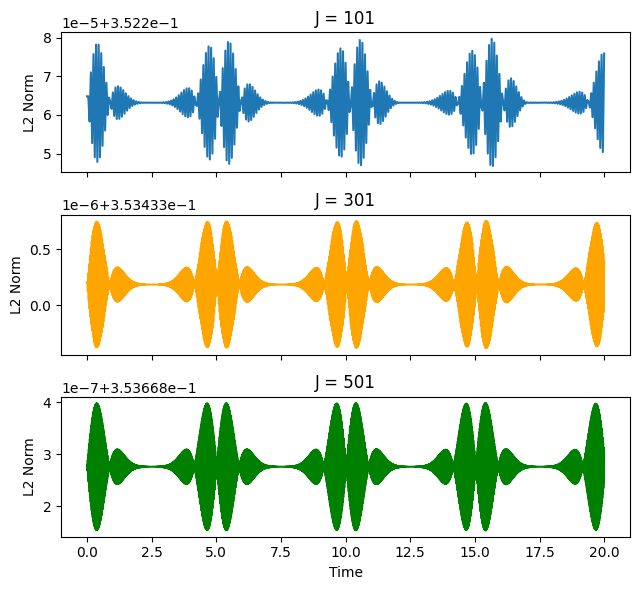

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
norm1 = np.load('./LEAPFROG/l2norm101.npy')
time1 = np.load('./LEAPFROG/time101.npy')
norm2 = np.load('./LEAPFROG/l2norm301.npy')
time2 = np.load('./LEAPFROG/time301.npy')
norm3 = np.load('./LEAPFROG/l2norm501.npy')
time3 = np.load('./LEAPFROG/time501.npy')

l2_saved = np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')


fig, axes = plt.subplots(3, 1, figsize=(6.5, 6), sharex=True)

# Primo grafico
axes[0].plot(time1, norm1, label='J=101')
axes[0].set_ylabel('L2 Norm')

axes[0].set_title('J = 101')

# Secondo grafico
axes[1].plot(time2, norm2, label='J=301', color='orange')
axes[1].set_ylabel('L2 Norm')

axes[1].set_title('J = 301')

# Terzo grafico
axes[2].plot(time3, norm3, label='J=501', color='green')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('L2 Norm')
axes[2].set_title('J = 501')

# Migliora layout e salva
plt.tight_layout()
plt.savefig('./LEAPFROG/L2_comparison_grid.png', dpi=300)
plt.show()
